1.6 MILLION UK TRAFFIC ACCIDENTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as px
import plotly.express as px
import random
import plotly.figure_factory as ff

In [2]:
df1 = pd.read_csv("C:/Users/user/Documents/veri/accidents_2005_to_2007.csv")
df2 = pd.read_csv("C:/Users/user/Documents/veri/accidents_2009_to_2011.csv")
df3 = pd.read_csv("C:/Users/user/Documents/veri/accidents_2012_to_2014.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_24496\2643423701.py:1: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\user\AppData\Local\Temp\ipykernel_24496\2643423701.py:3: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
datas = pd.concat([df1,df2,df3])
datas

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [5]:
datas.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [6]:
datas.shape

(1504150, 33)

In [7]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [4]:
data = datas.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

In [5]:
data.head(10)

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
5,3,2,1,3,12:40,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
6,3,2,1,5,20:40,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
7,3,1,2,6,17:35,Dual carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
8,3,2,2,7,22:43,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
9,3,2,5,7,16:00,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005


In [6]:
data.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [7]:
data.dropna(inplace=True)
data.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

Number of Traffic Acciddetns By Years and Weekdays

In [9]:
year = data["Year"].value_counts() 
year

2005    198474
2006    188913
2007    181881
2012    179436
2009    163334
2010    154185
2011    151241
2014    146100
2013    138393
Name: Year, dtype: int64

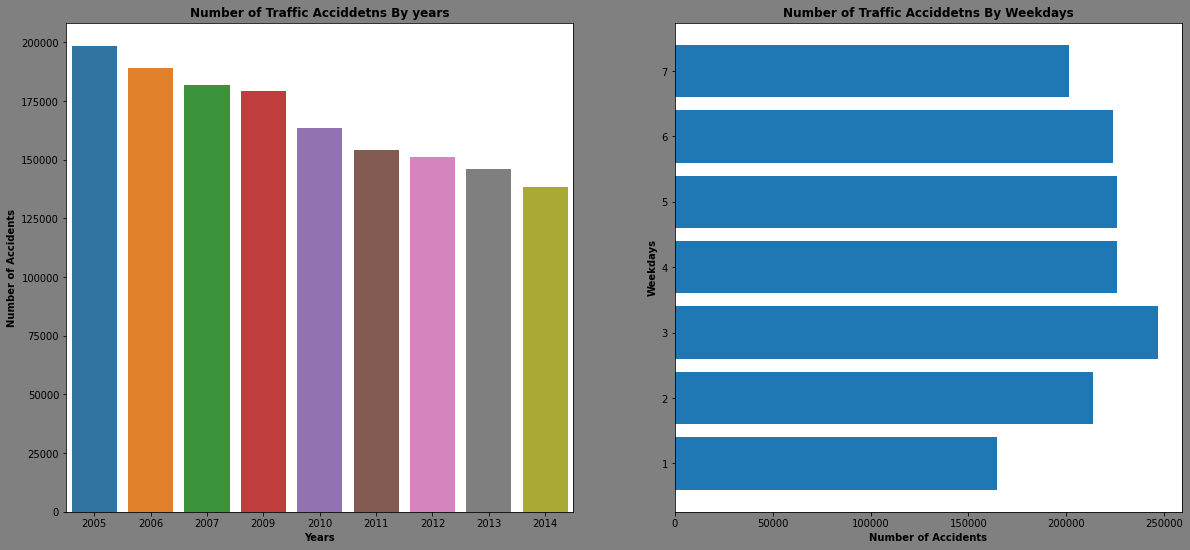

In [11]:
import seaborn as sns
year = data["Year"].value_counts() 

years = data["Year"].unique()
num = year.values

week = data["Day_of_Week"].value_counts()
week
weeks = data["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")

plt.title("Number of Traffic Acciddetns By years",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(weeks,num_w)
plt.title("Number of Traffic Acciddetns By Weekdays",weight="bold")
plt.xlabel("Number of Accidents",weight="bold")
plt.ylabel("Weekdays",weight="bold")
plt.show()

Accident Rate by Time of Day - HeatMap

<function matplotlib.pyplot.show(close=None, block=None)>

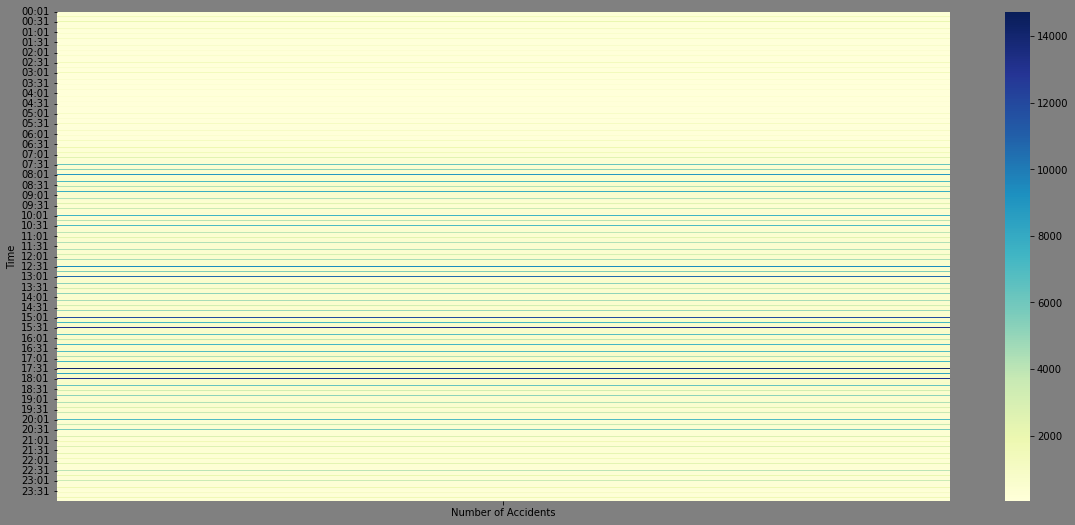

In [12]:
time = data["Time"].value_counts() 

time_df = pd.DataFrame(time, index=data["Time"])
time_df.columns =['Number of Accidents']
time_heat = time_df.groupby('Time').min()

plt.figure(figsize = (20,9),facecolor='grey')
ax = sns.heatmap(time_heat,cmap="YlGnBu") 
plt.yticks(rotation =0)
plt.show

How Weather Events Affect Roads and What Weather Conditions Cause the Most Traffic Accidents?

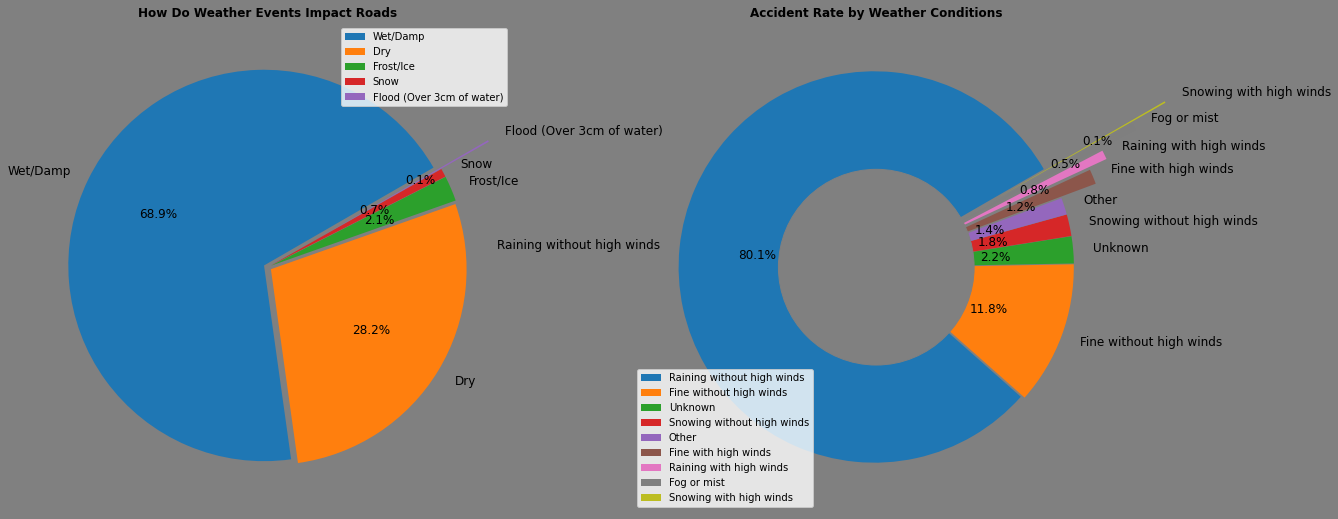

In [13]:
road_cond = data["Road_Surface_Conditions"].value_counts()

road_cond_arr = data["Road_Surface_Conditions"].unique()
road_num_acc_arr = road_cond.values

weather_cond = data["Weather_Conditions"].value_counts() 

weather_cond_arr = data["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values
plt.figure(figsize = (20,9),facecolor='grey')
plt.subplot(1, 2, 1)

plt.pie(road_num_acc_arr, labels = road_cond_arr, colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.02,0.02,0.02,0.02,0.3),autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Roads",weight="bold")


plt.subplot(1, 2, 2)

plt.pie(weather_num_acc_arr, labels = weather_cond_arr,colors = sns.color_palette(),startangle = 30,textprops={'size': 'large'},explode=(0.01,0.01,0.01,0.01,0.01,0.20,0.3,0.50,0.7),autopct="%1.1f%%")
plt.legend(loc ="lower left")
plt.title("Accident Rate by Weather Conditions",weight="bold")

my_circle = plt.Circle((0,0),0.5, color ='grey')
fig = plt.gcf()
fig.gca().add_artist(my_circle)

plt.show()

What is the Difference Between Urban and Rural Area Traffic Accidents Risks?

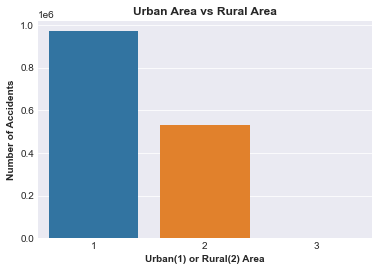

In [14]:
data["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 

In [15]:
data["Road_Type"].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [16]:
data["Road_Type"]=[1 if each == "Single carriageway" else 2
                          if each == "Dual carriageway" else 3
                          if each == "One way street" else 4
                          if each == "Roundabout" else 5
                          if each == "Slip road" else 6
                          for each in data["Road_Type"]]

In [17]:
data["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds'], dtype=object)

In [18]:
data["Weather_Conditions"]=[1 if each == "Raining without high winds" else 2
                          if each == "Fine without high winds" else 3
                          if each == "Unknown" else 4
                          if each == "Snowing without high winds" else 5
                          if each == "Other" else 6
                          if each == "Fine with high winds" else 7
                          if each == "Raining with high winds" else 8
                          if each == "Fog or mist" else 9         
                          for each in data["Weather_Conditions"]]

In [19]:
data["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)'], dtype=object)

In [20]:
data["Road_Surface_Conditions"]=[1 if each == "Wet/Damp" else 2
                          if each == "Dry" else 3
                          if each == "Frost/Ice" else 4
                          if each == "Snow" else 5       
                          for each in data["Road_Surface_Conditions"]]

In [21]:
data["Light_Conditions"].unique()

array(['Daylight: Street light present',
       'Darkness: Street lights present and lit',
       'Darkness: Street lighting unknown',
       'Darkness: Street lights present but unlit',
       'Darkeness: No street lighting'], dtype=object)

In [22]:
data["Light_Conditions"]=[1 if each == "Daylight: Street light present" else 2
                          if each == "Darkness: Street lights present and lit" else 3
                          if each == "Darkness: Street lighting unknown" else 4
                          if each == "Darkness: Street lights present but unlit" else 5  
                          if each == "Darkeness: No street lighting" else 6
                          for each in data["Light_Conditions"]]

In [23]:
data.drop(["Time"], axis=1, inplace=True)

In [24]:
data.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,1,1,1,1,1,2005
1,3,1,1,4,2,2,2,2,1,2005
2,3,2,1,5,1,2,2,2,1,2005
3,3,1,1,6,1,1,2,2,1,2005
4,3,1,1,2,1,3,2,1,1,2005


In [25]:
X = data.drop(["Accident_Severity"],axis=1).values
y = data["Accident_Severity"].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1201565, 9), (300392, 9), (1201565,), (300392,))

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

# Training model
regressor = RandomForestRegressor(n_estimators=100, max_features = 0.5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() # Estimating running time of the model
print(f'Run time : {time_end - time_start}')

Run time : 188.9151930809021


In [30]:
from sklearn import metrics

print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.13280826275645552
Testing score:   0.002345766248359027
Root Mean Squared Error: 0.40149428149632604


KNN

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

result1 = classification_report(y_test,y_pred)
print("Classifier Report")
print(result1)

result2 = accuracy_score(y_test,y_pred)
print("Accuracy Score")
print(result2)

Confusion Matrix
[[    17    333   3596]
 [    39   2082  38450]
 [    68   6634 249173]]
Classifier Report
              precision    recall  f1-score   support

           1       0.14      0.00      0.01      3946
           2       0.23      0.05      0.08     40571
           3       0.86      0.97      0.91    255875

    accuracy                           0.84    300392
   macro avg       0.41      0.34      0.33    300392
weighted avg       0.76      0.84      0.79    300392

Accuracy Score
0.8364803323657088
